# CAO Points 2021/2020/2019 Level 8 Courses Points Comparison 
***




The first thing we need to do is to load the libraries and modules that required to run this notebook. This list will increase as we describe the dataset.

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# For downloading 2020 points.
import urllib.request as urlrq

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly import subplots
from plotly.subplots import make_subplots

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

### 2021 Points
***

[CAO WEBSITE 2021 POINTS](http://www.cao.ie/index.php?page=points&p=2021)

In [3]:
# following code was devised using videos https://web.microsoftstream.com/video/6524792e-734f-4dc5-8dbd-31efccc3c0a9
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Have a quick peek. 200 means OK. To see the entire uplaod we could use resp.text
resp

<Response [200]>

In [4]:
# Compile the regular expression for matching lines. The {} are the quantifiers for the letter or number we want to match. The * is the wildcard and will select everything else on the line.
#ref https://docs.python.org/3/library/re.html
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

In [5]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [6]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row wth the names on the columns that we need.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [7]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [8]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


### 2020 Points
***

These points are displayed in an excel sheet with multiple columns that do not contain any relevant information. The R1 and R2 points seem to be displayed on multiple columns also with points,random and EOS being used as names in these columns.

[CAO WEBSITE 2020 POINTS](https://www.cao.ie/index.php?page=points&p=2020)

In [9]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [10]:
# Create a file path for the original data.
path = 'data/cao2020_' + nowstr + '.xlsx'

In [11]:
# 
urlrq.urlretrieve(url2020, path)

('data/cao2020_20220101_203427.xlsx',
 <http.client.HTTPMessage at 0x284ea6056a0>)

In [12]:
# Download and parse the excel spreadsheet. skiprow=delete the preamble of the dataset
df2020 = pd.read_excel(url2020, skiprows=10)

In [13]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Spot check a random row.
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [15]:
# Spot check the last row.
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [16]:
# Create a file path for the pandas data.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [17]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

In [18]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

# CAO 2019 POINTS

***

[CAO WEBSITE 2019 POINTS](http://www2.cao.ie/points/lvl8_19.pdf)


**Steps to reproduce:**

- Download original pdf file.
- Open original pdf file in microsoft word.
- Save Mircosoft Word's converted pdf in the docx format.
- Resave word document for editing.
- Delete headers and footers.
- Delete preample in page 1.
- Select all and copy to notepad++.
- Delete blank lines and remove HEI headings and paste onto each course line respectively (using alt + scroll down).
- Insert double quotes along the HEI title as this will make it easier to edit using regular expressions. 
- Change backtick's to apostrophes.
- Go to repleace all with \t (tab delimiter) and replace with comma(,) as it is a CSV file.
- Many commas throughout the document so we couldn't load the dataframe as a csv file. Instead we went back to original format with the delimiter as the tab.
- When reading data in the sep = '\t' was used as the delimiter for separating the columns.
- Errors occured while laoding this data because unknowningly there were some double tabs on the document. Fix was to replace \t\t with \t. DF was able to be read in after this.
- I went back to the dataset and then replaced all ` back ticks ` with the correct ' forward tick mark.

In [19]:
df2019 = pd.read_csv('data/cao2019_20211211_edited.txt', sep = '\t')

In [20]:
df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
Waterford Institute of Technology,WD200,Arts (options),221,296.0
Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
Waterford Institute of Technology,WD211,Creative Computing,275,322.0
Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


In [21]:
#  Concat and Join the Points: 

The first thing to do is to generate the datasets so they all contain the codes and the course title.

In [22]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [23]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [24]:
courses2019 = df2019[['Course Code','INSTITUTION and COURSE']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming
Athlone Institute of Technology,AL802,Software Design with Cloud Computing
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure
Athlone Institute of Technology,AL810,Quantity Surveying
...,...,...
Waterford Institute of Technology,WD200,Arts (options)
Waterford Institute of Technology,WD210,Software Systems Development
Waterford Institute of Technology,WD211,Creative Computing
Waterford Institute of Technology,WD212,Recreation and Sport Management


In [25]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [26]:
# in order to run the duplicated function we need to sort the dataset per code as the course title could change per year.
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
946,WD230,Mechanical and Manufacturing Engineering
3343,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education
948,WD232,Business Information Systems


In [27]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [28]:
# using the code subset we have found 1692 duplicated courses
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [29]:
#  inplace=true is used to return a new dataframe. In order not to delete duplicate numbers in the index we use ignore_index=True
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1647,SG441,Environmental Science
1648,SG446,Applied Archaeology
1649,TL803,Music Technology
1650,TL812,Computing with Digital Media


In [30]:
# checkpoint Finds all extra copies of duplicated rows. This should be empty if the duplicate code had worked.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title


In [31]:
# after I viewed this csv file I found an empty row. used below code to corrcet this. 
allcourses.to_csv('allcourses.csv')

In [32]:
#ref: https://stackoverflow.com/questions/52655623/removing-an-empty-row-from-pandas-dataframe.
# replace the empty row with nan and then use dropna to remove the row. After running this the empty row has been removed.
allcourses.replace('', np.NaN).dropna(how='all')

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1647,SG441,Environmental Science
1648,SG446,Applied Archaeology
1649,TL803,Music Technology
1650,TL812,Computing with Digital Media


# Join datasets Round 1 points from 2021/2020/2019.

In [33]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']


In [34]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [35]:
allcourses = allcourses.join(df2021[['points_r1_2021']])


In [36]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']


In [37]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)


In [38]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)


In [39]:
# I have just realised now when doing the round 2 points tat I originally used EOS as the column for round 1 instead of Mid. The Mid points are much higher so much be the R1 points. 
df2019_r1 = df2019[['Course Code', 'Mid']]
df2019_r1.columns = ['code', 'points_r1_2019']


In [40]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)


In [41]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,358.0
SG446,Applied Archaeology,NaN,NaN,290.0
TL803,Music Technology,NaN,NaN,288.0


In [42]:
pd.set_option("display.max_columns", None)
allcourses.describe()

,points_r1_2019
count,915.000000
mean,426.414208
std,133.142255
min,57.000000
25%,339.000000
50%,397.000000
75%,477.500000
max,1073.000000


As can be seen above the level 1 round courses have 915 courses between the three years. The mean points for the courses here is 426 points. Surprisingly the minimum amount of ponts required for a level 8 course in round 1 in one of the years was 57 points and the max was 1073.

In [43]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1652 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1651 non-null   object 
 1   points_r1_2021  928 non-null    object 
 2   points_r1_2020  1437 non-null   object 
 3   points_r1_2019  915 non-null    float64
dtypes: float64(1), object(3)
memory usage: 129.1+ KB


In [44]:
# From looking at the dataset here we can see there are some characters in the dataset we must remove before we further analyse it. As we need the characters in all
# three colums to be numeric.
allcourses. iloc[60:75]

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CW848,Digital Marketing with Analytics,269,254,307.0
CW858,Sports Management and Coaching (options portf...,#700,700,700.0
CW908,Business (options),272,280,307.0
CW938,Business with Law,270,283,288.0
CW948,Accounting,319,300,408.0
PC405,Social Political and Community Studies,263,253,296.0
PC410,Arts and Humanities (fulfils Teaching Council ...,262,252,289.0
PC411,English and History (fulfils Teaching Council ...,243,255,289.0
CR105,Chemical and Biopharmaceutical Engineering,443,443,498.0


In [45]:
# I want to drop all the NaN Values as I can't compare these courses correctly over the years 
#https://sparkbyexamples.com/pandas/pandas-drop-rows-with-nan-values-in-dataframe/#:~:text=Alternatively%2C%20you%20can%20also%20use%20axis%3D0%20as%20a,you%20can%20do%20so%20using%20reset_index%20%28%29%20method.
allcourses=allcourses.dropna()

In [46]:
#I cans See from the below nsmallest code there is an NAN in the 2020 dataset. 
allcourses=allcourses.replace('NaN','',regex=True)

In [47]:
allcourses=allcourses.replace('#','', regex=True)

In [48]:
allcourses=allcourses.replace('AQA','', regex=True)

In [49]:
# Just to make it easier writing the code I have shortened the name of the dataset to ac3
ac3=allcourses

In [50]:
#In order to compare the course points I need to change there dtype to float64
ac3['points_r1_2021']=pd.to_numeric(ac3['points_r1_2021'], errors='coerce').astype('float64')
ac3['points_r1_2020']=pd.to_numeric(ac3['points_r1_2020'], errors='coerce').astype('float64')
ac3['points_r1_2019']=pd.to_numeric(ac3['points_r1_2019'], errors='coerce').astype('float64')

In [51]:
#checkpoint ensure all dtypes in the df are a float.
ac3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, AL801 to WD230
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           727 non-null    object 
 1   points_r1_2021  653 non-null    float64
 2   points_r1_2020  710 non-null    float64
 3   points_r1_2019  727 non-null    float64
dtypes: float64(3), object(1)
memory usage: 28.4+ KB


In [52]:
# now that the dtype is numeric I can use the nlargest and nsmallest functions on the dataset
ac3.nlargest(5, ['points_r1_2021','points_r1_2020','points_r1_2019'], keep='first')

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
DL832,Animation,989.0,920.0,1055.0
LC114,Fashion and Textiles for Product and Costume (...,914.0,880.0,988.0
CR121,Music at CIT Cork School of Music,904.0,868.0,1052.0
LC502,Game Art and Design (portfolio),841.0,852.0,950.0


In [53]:
ac3.nsmallest(5, ['points_r1_2021','points_r1_2020','points_r1_2019'], keep='first')

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
GA887,History and Geography,201.0,244.0,296.0
WD200,Arts (options),201.0,NaN,296.0
MI001,Contemporary and Applied Theatre Studies,209.0,375.0,381.0
DB510,Audio Production and Music Project Management,217.0,234.0,293.0
GA380,International Hotel Management,218.0,242.0,289.0


In [54]:
# I created a csv file to look for the NAN but it appears blank when the df is read to csv.
ac3.to_csv('ac3.csv')

# Join datasets Round 2 points from all years

In [55]:
allcoursesr2= pd.concat([courses2021, courses2020, courses2019], ignore_index=True)

In [56]:
allcoursesr2[allcoursesr2.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [57]:
allcoursesr2.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3282,TL801,Animation Visual Effects and Motion Design
3283,TL802,"TV, Radio and New Media"
3284,TL803,Music Technology
3287,TL812,Computing with Digital Media


In [58]:
allcoursesr2[allcoursesr2.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [59]:
allcoursesr2.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [60]:
allcoursesr2.set_index('code', inplace=True)

In [61]:
allcoursesr2 = allcoursesr2.join(df2021[['points_r2_2021']])

In [62]:
df2020_r2 = df2020[['COURSE CODE2', 'EOS']]
df2020_r2.columns = ['code', 'points_r2_2020']


In [63]:
# Set the index to the code column.
df2020_r2.set_index('code', inplace=True)


In [64]:
# Join 2020 points to allcoursesR2.
allcoursesr2 = allcoursesr2.join(df2020_r2)

In [65]:
df2019_r2 = df2020[['COURSE CODE2', 'EOS']]
df2019_r2.columns = ['code', 'points_r2_2019']


In [66]:
# Set the index to the code column.
df2019_r2.set_index('code', inplace=True)


In [67]:
# Join 2019 points to allcoursesR2.
allcoursesr2 = allcoursesr2.join(df2019_r2)
allcoursesr2

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,303,303
AL802,Software Design in Artificial Intelligence for...,NaN,332,332
AL803,Software Design for Mobile Apps and Connected ...,NaN,337,337
AL805,Computer Engineering for Network Infrastructure,NaN,333,333
AL810,Quantity Surveying,NaN,326,326
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN


We can see from the dataset above that alot of the courses in 2021 did not have any r2 points attached to them meaning the course must have been filled int he first round.

In [68]:
#changed the name of the dataset to make the coding easier
acr2=allcoursesr2

In [69]:
#https://www.geeksforgeeks.org/how-to-drop-rows-with-nan-values-in-pandas-dataframe/
acr2=acr2.dropna()


In [70]:
acr2=acr2.replace('#','', regex=True)

In [71]:
acr2=acr2.replace('AQA','', regex=True)

In [72]:
acr2['points_r2_2021']=pd.to_numeric(acr2['points_r2_2021'], errors='coerce').astype('float64')
acr2['points_r2_2020']=pd.to_numeric(acr2['points_r2_2020'], errors='coerce').astype('float64')
acr2['points_r2_2019']=pd.to_numeric(acr2['points_r2_2019'], errors='coerce').astype('float64')

In [76]:
# Once editing has been completed on the R2 Dataset we are left with only 246 rows of data. This means within the three years there were just 246 courses offering second round offers in the CAO.
acr2

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
AL830,General Nursing,444.0,442.0,442.0
AL832,Mental Health Nursing,431.0,384.0,384.0
AL841,Athletic and Rehabilitation Therapy,NaN,430.0,430.0
AL854,Sport Management (with international placement),299.0,299.0,299.0
AL870,Applied Psychology,NaN,418.0,418.0
...,...,...,...,...
TL891,Mental Health Nursing and Mature Applicants,419.0,378.0,378.0
WD001,Applied Computing (options),261.0,260.0,260.0
WD007,Engineering (options),270.0,288.0,288.0


In [74]:
acr2.nlargest(5, ['points_r2_2021','points_r2_2020','points_r2_2019'], keep='first')

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
CR121,Music at CIT Cork School of Music,904.0,912.0,912.0
AD211,Fashion Design (portfolio),679.0,NaN,NaN
DL833,Photography and Visual Media,671.0,667.0,667.0
TU832,Architecture (Suitability Test and Interview),638.0,622.0,622.0
DN670,Economics and Finance,625.0,613.0,613.0
RC005,Pharmacy,613.0,578.0,578.0
CR700,Theatre and Drama Studies at CIT Cork School o...,609.0,645.0,645.0
TR018,Law and French,602.0,565.0,565.0
TR006,Psychology,590.0,555.0,555.0


In [77]:
acr2.nsmallest(5, ['points_r2_2021','points_r2_2020','points_r2_2019'], keep='last')

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
DB531,Marketing,176.0,293.0,293.0
DB501,Computing (Cloud Computing),178.0,227.0,227.0
WD200,Arts (options),201.0,NaN,NaN
DB512,Business Studies,210.0,203.0,203.0
DB567,Film and Creative Media,213.0,202.0,202.0
DB510,Audio Production and Music Project Management,217.0,223.0,223.0
DB515,Business Studies (Human Resource Management),217.0,244.0,244.0
DB527,Applied Social Care,219.0,234.0,234.0
PC411,English and History (fulfils Teaching Council ...,224.0,209.0,209.0


# Data Analysis of Round 1 and Round 2 points for level 8 courses in 2021,2020, and 2019.

<br>

### Round 1 Points Analysis
***

It is worth noting here that all courses that had NAN/AQA/+Matric have been removed from the datasets so we are anlaysing them on numerical basis only. Some courses that required portfolios or additional criteria may have been removed from these datasets.

- The mean points required in 2021/2020/ and 2019 were 400,393, and 429.
- The min points required for level 8 courses in 2021/2020 and 2019 were 201,55 and 57.
- The max points required for level 8 courses in 2021/2020 and 2019 were 1028,1088 and 1055. 
- The amount of courses offered in R1 with numeric values only for 2021/2020/2019 were 653,710,727.

Below we can look at the what the courses are that had the lowest and the highest points.
The courses with the lowest points is actually for medicine and it not based on the CAO points but rather the GAMASAT results.
The course with the highest points is for Music. AT 1028 points this must mean additional criteria is required to get into this course.

Upon further investigation into the Music Course there is an entrance exam that must be taken by the applicant and this can account for up to a maximum of 600 points.
This would mean if you attained 428 with an excellent entranc exam you might get this course in the first round.
ref: https://www.cit.ie/course/MT937

Upon further investigation into the GAMASAT scores anything below 56 is considered below average and so setting the R1 points at 55 is taking on students that are just in the average score point. Anything above 73 is considered very high and in the 98th percentile of scores. The numbers appea deceptively low for a Level 8 course however it regards to the GAMASAT this is an average point.ref: https://www.gamsat-prep.com/GAMSAT-scores/


In [90]:
ac3.describe()

,points_r1_2021,points_r1_2020,points_r1_2019
count,653.000000,710.000000,727.000000
mean,400.695253,393.015493,429.325997
std,123.772875,121.136036,122.039948
min,201.000000,55.000000,57.000000
25%,301.000000,301.000000,347.000000
50%,381.000000,376.000000,403.000000
75%,489.000000,473.000000,488.000000
max,1028.000000,1088.000000,1055.000000


In [82]:
#https://www.statology.org/pandas-find-value-any-column/
ac3[ac3.isin([55]).any(axis=1)]

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
LM101,Medicine - Graduate Entry (GAMSAT required),NaN,55.0,57.0


In [85]:
ac3[ac3.isin([1088]).any(axis=1)]

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0


In [95]:
acr2.nsmallest(1, ['points_r2_2021','points_r2_2020','points_r2_2019'], keep='last')

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
DB531,Marketing,176.0,293.0,293.0


<br>

### Round 2 Points Analysis
***

It is worth noting here again that all courses that had NAN/AQA/+Matric have been removed from the datasets so we are analyzing courses on numerical basis only. Some courses that required portfolios or additional criteria may have been removed from the R2 datasets.


- The mean points required in 2021/2020/ and 2019 Round 2  were 385,398, and 398 repectively.
- The min points required for level 8 courses Round 2 in 2021/2020 and 2019 were 176,57 and 57.
- The max points required for level 8 courses Round 2 in 2021/2020 and 2019 were 904,912 and 912. 
- The amount of courses offered in Round 2 with numeric values only for 2021/2020/2019 were 653,710,727.

Looking at the course with the highest points at 912 we can see this is again the same course that was highest in R1 for Music at CIT.

Looking at the course with the lowest points we can see it is again Medicine with the GAMASAT score looked at instead of CAO points. 

If I am looking for the lowest points inregards the CAO points I use the nsmallest funtion to see the lowest 5 courses points wise. When this was looked it the course requiring the least amount of points was Marketing in Dublin Business School. Ths was also the lowest amount of points in the R1 points when the GAMASAT points were not used.

In [88]:
acr2.describe()

,points_r2_2021,points_r2_2020,points_r2_2019
count,192.000000,242.000000,242.000000
mean,385.119792,398.913223,398.913223
std,124.794034,126.820571,126.820571
min,176.000000,57.000000,57.000000
25%,276.750000,304.000000,304.000000
50%,368.500000,397.500000,397.500000
75%,476.250000,477.000000,477.000000
max,904.000000,912.000000,912.000000


In [91]:
acr2[acr2.isin([912]).any(axis=1)]

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
CR121,Music at CIT Cork School of Music,904.0,912.0,912.0


In [92]:
acr2[acr2.isin([57]).any(axis=1)]

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
CK791,Medicine - Graduate Entry (GAMSAT required),NaN,57.0,57.0


In [93]:
acr2.nsmallest(5, ['points_r2_2021','points_r2_2020','points_r2_2019'], keep='last')

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
DB531,Marketing,176.0,293.0,293.0
DB501,Computing (Cloud Computing),178.0,227.0,227.0
WD200,Arts (options),201.0,NaN,NaN
DB512,Business Studies,210.0,203.0,203.0
DB567,Film and Creative Media,213.0,202.0,202.0


In [94]:
acr2[acr2.isin([176]).any(axis=1)]

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
DB531,Marketing,176.0,293.0,293.0


In [97]:
# the code below is only giving the points beyween the range 50-630 in the 2021 r1 points column
#https://www.statology.org/pandas-select-rows-based-on-column-values/#:~:text=You%20can%20use%20one%20of%20the%20following%20methods,%5Bdf%5B%27%20col1%20%27%5D.%20isin%20%28%5Bvalue1%2C%20value2%2C%20value3%2C%20...%5D%29%5D
x= ac3.dropna().loc[(ac3['points_r1_2021'] >= 60) & (ac3['points_r1_2021'] < 630)]
x

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,303.0,328.0
AL802,Software Design in Artificial Intelligence for...,313.0,332.0,306.0
AL803,Software Design for Mobile Apps and Connected ...,350.0,337.0,337.0
AL805,Computer Engineering for Network Infrastructure,321.0,333.0,442.0
AL810,Quantity Surveying,328.0,319.0,349.0
...,...,...,...,...
WD195,Architectural and Building Information Modelli...,279.0,279.0,305.0
WD210,Software Systems Development,260.0,279.0,329.0
WD211,Creative Computing,270.0,271.0,322.0


In [117]:
c=x.nlargest(5, ['points_r1_2021','points_r1_2020','points_r1_2019'], keep='first')
c

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
GY303,Biomedical Science,613.0,556.0,566.0
CR700,Theatre and Drama Studies at CIT Cork School o...,609.0,740.0,906.0
DC119,Global Business (Canada),601.0,564.0,577.0
GY502,Occupational Therapy,601.0,555.0,543.0
DL826,Graphic Design,591.0,855.0,989.0


<function matplotlib.pyplot.show(close=None, block=None)>

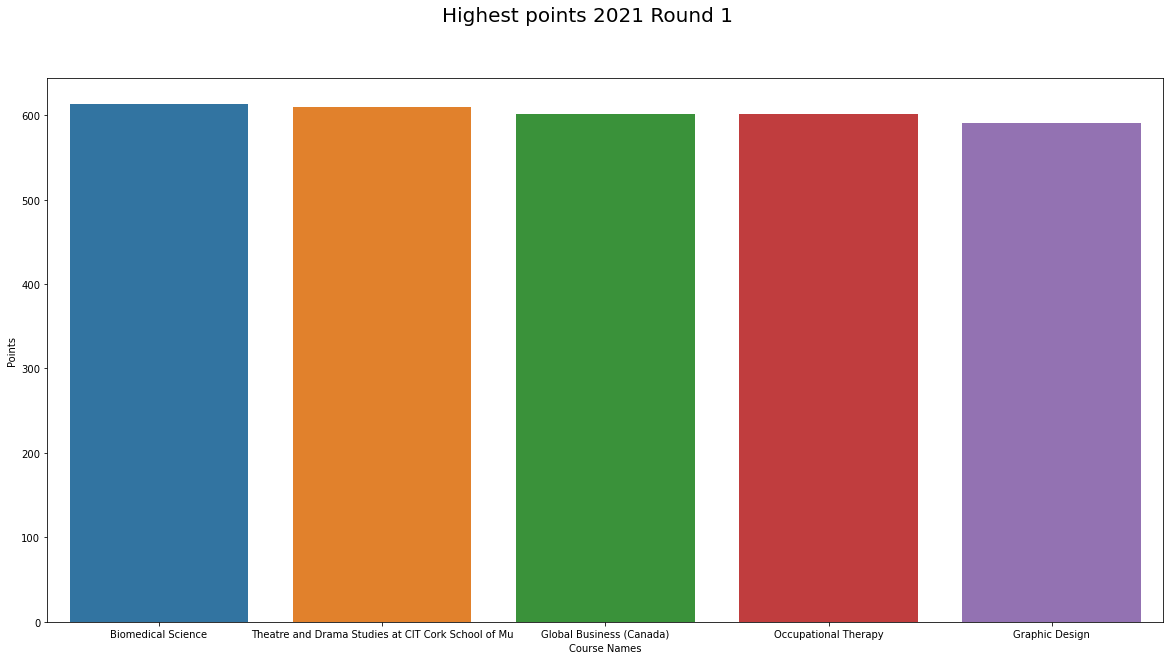

In [126]:
plt.figure(figsize=(20,10))

sns.barplot(x='title',y='points_r1_2021',data=c)
plt.suptitle('Highest points 2021 Round 1', fontsize=20)
plt.xlabel('Course Names')
plt.ylabel('Points')
plt.show

In [119]:
d=x.nsmallest(5, ['points_r1_2021','points_r1_2020','points_r1_2019'], keep='last')

<function matplotlib.pyplot.show(close=None, block=None)>

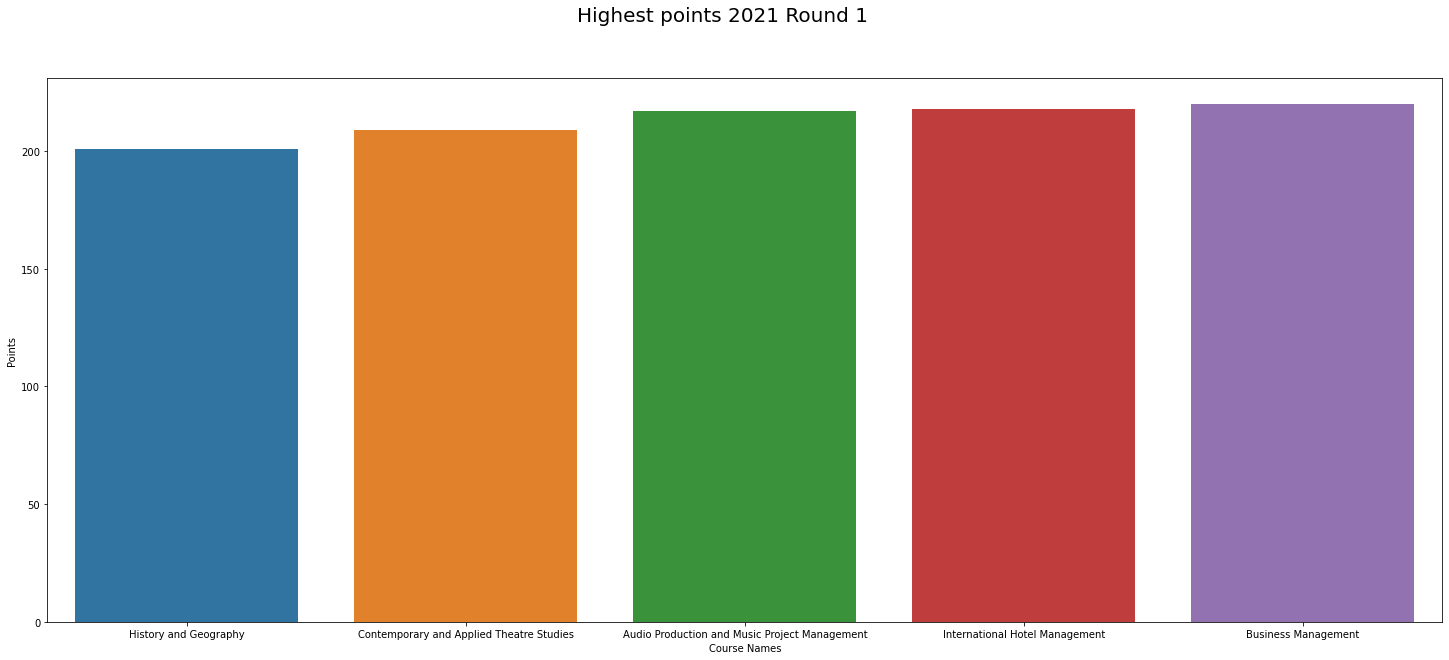

In [127]:
plt.figure(figsize=(25,10))

sns.barplot(x='title',y='points_r1_2021',data=d)
plt.suptitle('Highest points 2021 Round 1', fontsize=20)
plt.xlabel('Course Names')
plt.ylabel('Points')
plt.show

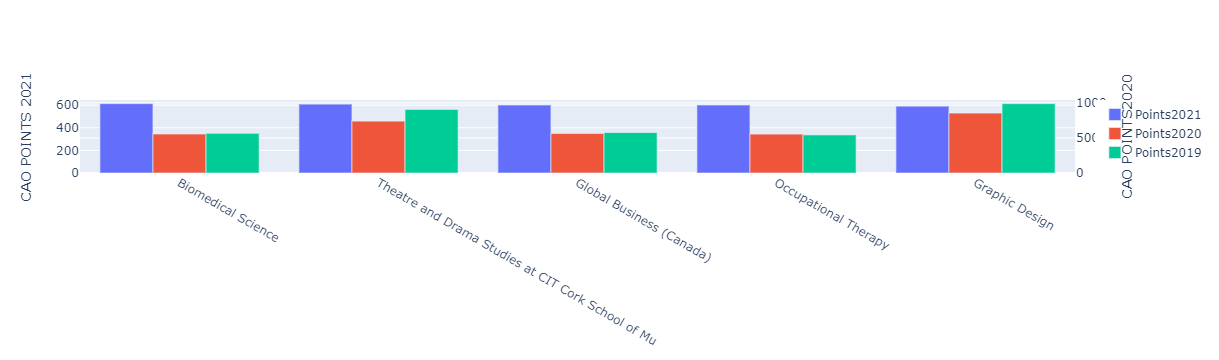

In [132]:
#ref https://www.weirdgeek.com/2020/05/plot-multiple-bar-graph-using-pythons-plotly-library/
fig = go.Figure(
    data=[
        go.Bar(name='Points2021', x=c["title"], y=c["points_r1_2021"], yaxis='y', offsetgroup=1),
        go.Bar(name='Points2020', x=c["title"], y=c["points_r1_2020"], yaxis='y2', offsetgroup=2),
        go.Bar(name='Points2019', x=c["title"], y=c["points_r1_2019"], yaxis='y2', offsetgroup=3)
    ],
    layout={
        'yaxis': {'title': 'CAO POINTS 2021 '},
        'yaxis2': {'title': 'CAO POINTS2020', 'overlaying': 'y', 'side': 'right'}
    , 'yaxis3':{'title': '','overlaying': 'free','side': 'right'}}
)
 
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

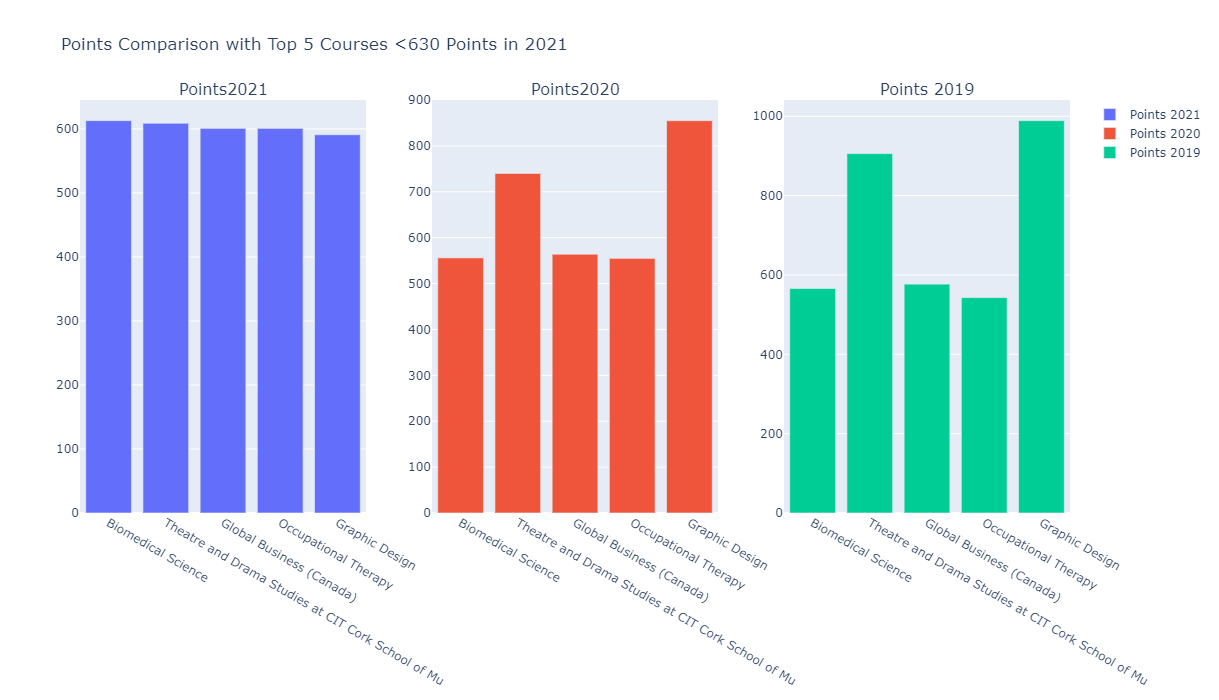

In [133]:
# The plots below are representing the top 5 courses from 2021 and what the points were for these courses in 2020 and 2019. It does not represent the top five courses from 2020 or 2019.
#https://plotly.com/python/subplots/#multiple-subplots-with-titles
#https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html
fig = make_subplots(rows=1,cols=3, subplot_titles = ('Points2021', 'Points2020', 'Points 2019'))
fig.add_trace(go.Bar(x=c['title'], y=c['points_r1_2021'], name = 'Points 2021'), row=1, col=1)
fig.add_trace(go.Bar(x=c['title'], y=c['points_r1_2020'], name = 'Points 2020'), row=1, col=2)
fig.add_trace(go.Bar(x=c['title'], y=c['points_r1_2019'], name = 'Points 2019'), row=1, col=3)

fig.update_layout(height=700, width=700,
                  title_text="Points Comparison with Top 5 Courses <630 Points in 2021")

fig.show()


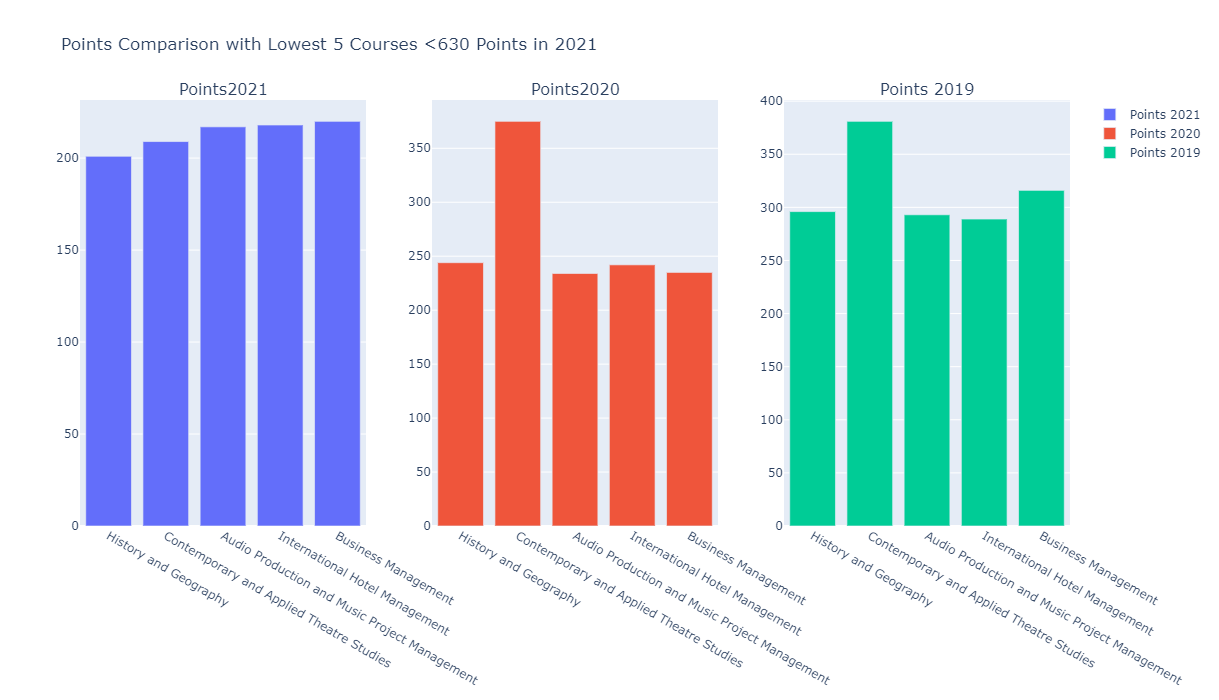

In [134]:
fig = make_subplots(rows=1,cols=3, subplot_titles = ('Points2021', 'Points2020', 'Points 2019'))
fig.add_trace(go.Bar(x=d['title'], y=d['points_r1_2021'], name = 'Points 2021'), row=1, col=1)
fig.add_trace(go.Bar(x=d['title'], y=d['points_r1_2020'], name = 'Points 2020'), row=1, col=2)
fig.add_trace(go.Bar(x=d['title'], y=d['points_r1_2019'], name = 'Points 2019'), row=1, col=3)

fig.update_layout(height=700, width=700,
                  title_text="Points Comparison with Lowest 5 Courses <630 Points in 2021")

fig.show()